## Importando as Bibliotecas

In [1]:
import pandas as pd
import seaborn as srn
import statistics  as sts

## Importando os Dados

In [2]:
dataset = pd.read_csv("tempo.csv", sep=";")
#visulizando
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


## Explorando os Dados Categoricos

In [3]:
#aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [4]:
#vento
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [5]:
#jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

## Visualizando em Gráfico

<AxesSubplot:xlabel='Jogar'>

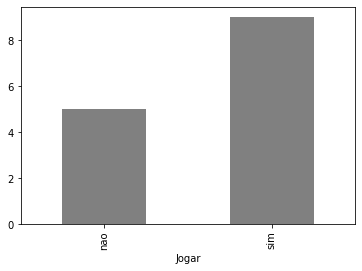

In [6]:
agrupado.plot.bar(color = 'gray')

## Explorando Colunas Numéricas

In [7]:
#temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [8]:
#Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

## Visualizando em Gráfico

Text(0.5, 1.0, 'Temperatura')

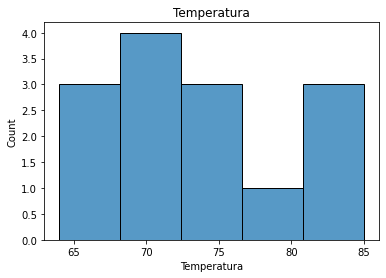

In [39]:
srn.histplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Umidade')

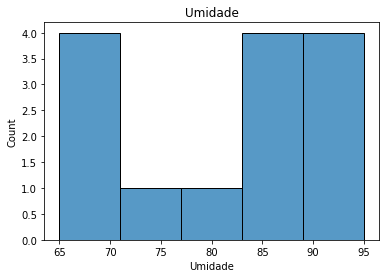

In [37]:
srn.histplot(dataset['Umidade']).set_title('Umidade')

## Contando Valores NAN

In [13]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

## Corrigindo Valor Inválido em "Aparencia"

In [14]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [15]:
dataset.loc[dataset['Aparencia'] ==  'menos', 'Aparencia'] = "Sol"
#visualizando o resultado
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
Sol        1
chuva      5
nublado    3
sol        5
dtype: int64

## Temperatura Fora do Domínio

In [16]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [17]:
#visualizando
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [18]:
#calculando a mediana
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [19]:
#substituíndo com a mediana
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130), 'Temperatura'] = mediana

In [20]:
#verificando se ainda existem tempertauras fora do domínio
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


## Umidade, Dominio e NAs

In [21]:
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [22]:
#total de Nas
dataset['Umidade'].isnull().sum()

1

In [23]:
#calulando a mediana
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [24]:
#preenchendo as NAs
dataset['Umidade'].fillna(mediana, inplace=True)

In [25]:
dataset['Umidade'].isnull().sum()

0

In [26]:
#visulizando de acordo com o dominio
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [27]:
#atualizando com a mediana
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade'] = mediana

In [28]:
#visulizando novamente
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [29]:
#ventos
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [30]:
#total de Nas
dataset['Vento'].isnull().sum()

1

In [31]:
#preenchendo as NAs
dataset['Vento'].fillna('FALSO', inplace=True)

In [32]:
#total de Nas
dataset['Vento'].isnull().sum()

0